# Implementasi Depth Limited Search


## Memuat Data

Network data for relationships between President Donald Trump and other people, which was originally compiled by John Templon, Anthony Cormier, Alex Campbell, and Jeremy Singer-Vine as part of a larger project of mapping "TrumpWorld" for BuzzFeed News.

The data was compiled by culling from "public records, news reports, and other sources on the Trump family, his Cabinet picks, and top advisers," as well as via crowdsourced tips and information from the public.

As Templon, Cormier, Campbell, and Singer-Vine suggest, "No American president has taken office with a giant network of businesses, investments, and corporate connections like that amassed by Donald J. Trump."

In [1]:
#import library
import pandas as pd

#load data
df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/trump/trump-edges.csv", delimiter=',')
df

,Source,Target,Weight,Relationship,Citation
0,Paul Teller,Donald J. Trump,1,Special assistant,https://www.documentcloud.org/documents/353434...
1,Donald J. Trump,Joe Hagin,1,Deputy chief of staff for operations,http://www.cnn.com/2017/01/04/politics/bill-st...
2,Donald J. Trump,Kellyanne Conway,1,White House Counselor,General knowledge
3,Donald J. Trump,Wilbur Ross,1,Secretary of Commerce,General knowledge
4,Donald J. Trump,George E. Norcross Iii,1,"""whose friendship with Mr. Trump dates to the ...",https://www.nytimes.com/2017/02/18/us/mar-a-la...
...,...,...,...,...,...
361,Tucker Carlson,Stephen Miller,1,Miller set up meeting between Carlson and Sess...,http://www.politico.com/magazine/story/2016/06...
362,Michelle Bachmann,Stephen Miller,1,Worked for her,http://www.politico.com/magazine/story/2016/06...
363,Melania Trump,Lindsey Reynolds,1,Chief of staff,http://www.politico.com/story/2017/02/donald-t...
364,Stephanie Winston Wolkoff,Melania Trump,1,Senior adviser,http://www.politico.com/story/2017/02/donald-t...


## Membentuk Graph

Mengaplikasikan *graph* menggunakan struktur data `dictionary`. `Keys` digunakan sebagai `nodes` dari *graph* dan `values`-nya adalah `lists` tiap `node` yang terhubung menggunakan `edge`. Contoh:

```
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }
```

In [2]:
#import dictionary for graph
from collections import defaultdict
  
#function for adding edge to graph 
graph = defaultdict(list)
def addEdge(graph,u,v): 
    graph[u].append(v)
  
#declaration of graph as dictionary 
for i in range(len(df)):
  addEdge(graph,df["Source"][i],df["Target"][i])

In [3]:
#print generated graph
graph

defaultdict(list,
            {'Paul Teller': ['Donald J. Trump'],
             'Donald J. Trump': ['Joe Hagin',
              'Kellyanne Conway',
              'Wilbur Ross',
              'George E. Norcross Iii',
              'Jared Kushner',
              'Stephen A. Schwarzman',
              'David Shulkin',
              'James Sherk',
              'Brian Baudreau',
              'Sean Hannity',
              'Robert Goad',
              'Steven N. Cheung',
              'Bill Stepien',
              'Ajit Pai',
              'Allen Weisselberg',
              'Eric Ueland',
              'Ado Machida',
              'Thomas J. Barrack Jr.',
              'Mehmet Ali Yalcindag',
              'Victor Pinchuk',
              'Russ Vought',
              'Mike Baselice',
              'Dan Coats',
              'Oleg Miserva',
              'Michael Flynn',
              'John Mcentee',
              'Betsy Devos',
              'Helen Ferre',
              'Andrew Bremberg',
  

## Visualisasi Graph

Memvisualisasikan *graph* menggunakan bantuan *library* `networkx` dan `matplotlib`.

In [4]:
#!pip install ipywidgets
#!pip install ipympl

In [5]:
#import library
import networkx as nx
import matplotlib.pyplot as plt

#interactive plot
%matplotlib notebook

#create graph
G = nx.Graph()
for i in range(len(df)):
  G.add_edge(df["Source"][i],df["Target"][i])

In [6]:
#print info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 303
Number of edges: 366
Average degree:   2.4158


<IPython.core.display.Javascript object>


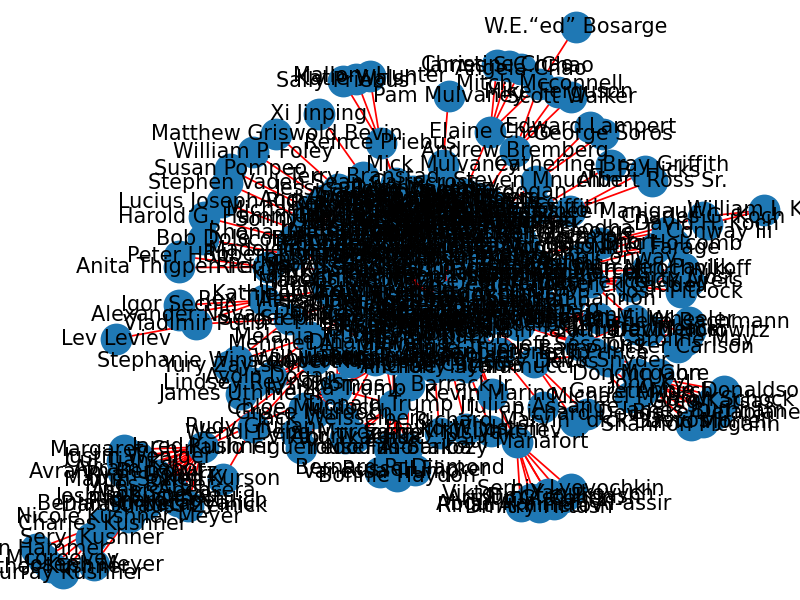

In [7]:
#draw graph
plt.figure()
nx.draw(G, with_labels=1, edge_color='red')

## Membuat Fungsi DLS

In [8]:
#function for depth limited search
def DLS(start,goal,path,level,maxD):
  print('\nLevel: ',level)
  print('Goal node testing for',start)
  path.append(start)
  #path = ['Donald J. Trump']
  
  if start == goal:
    print("Goal test successful")
    return path
  print('Goal node testing failed')

  #misal level = 3, maxD = 3
  #pindah cabang
  if level==maxD:
    return False
  print('\nExpanding the current node',start)
  for child in graph[start]:
    if DLS(child,goal,path,level+1,maxD):
      return path
    path.pop()
  return False

## Menerapkan DLS

In [9]:
start = "Donald J. Trump"
goal = input('Enter the goal node: ') #Angela Chao
path = list()
level = 0
maxD = int(input("Enter the maximum depth limit: "))

res = DLS(start,goal,path,level,maxD)
if(res):
    print("Path to goal node available")
    print("Path",path)
else:
    print("No path available for the goal node in given depth limit")

Enter the goal node: Cliff Sims
Enter the maximum depth limit: 3

Level:  0
Goal node testing for Donald J. Trump
Goal node testing failed

Expanding the current node Donald J. Trump

Level:  1
Goal node testing for Joe Hagin
Goal node testing failed

Expanding the current node Joe Hagin

Level:  1
Goal node testing for Kellyanne Conway
Goal node testing failed

Expanding the current node Kellyanne Conway

Level:  1
Goal node testing for Wilbur Ross
Goal node testing failed

Expanding the current node Wilbur Ross

Level:  2
Goal node testing for James Uthmeier
Goal node testing failed

Expanding the current node James Uthmeier

Level:  1
Goal node testing for George E. Norcross Iii
Goal node testing failed

Expanding the current node George E. Norcross Iii

Level:  1
Goal node testing for Jared Kushner
Goal node testing failed

Expanding the current node Jared Kushner

Level:  2
Goal node testing for Rob Speyer
Goal node testing failed

Expanding the current node Rob Speyer

Level:  1


## Visualisasi Path

In [10]:
H = nx.Graph()

for i in range(1,len(path)):
  H.add_edge(path[i-1],path[i])

In [11]:
print(nx.info(H))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


<IPython.core.display.Javascript object>


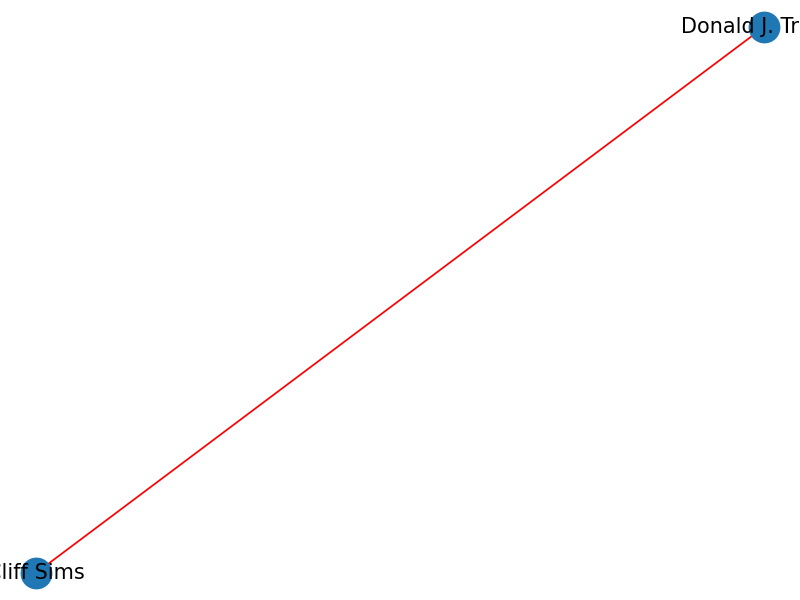

In [12]:
plt.figure()
nx.draw(H, with_labels=1, edge_color='red')